# The Battle of the Neighborhoods - Bangalore Edition.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis


import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
from bs4 import BeautifulSoup

### Loading Bangalore Neighborhood Dataset from Github

In [8]:
dfs = pd.read_html('https://github.com/utkarshchoubeycs/Coursera_Capstone/blob/master/complete_dataset.csv')
df = dfs[0]
df.head()

,Unnamed: 0,Unnamed: 1,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,NaN,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,NaN,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,NaN,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,NaN,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,NaN,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [9]:
df.drop(columns = ['Unnamed: 0','Unnamed: 1','City'], inplace = True)
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,53270.063892


In [10]:
df['Borough'].nunique() #total no of boroughs

8

In [11]:
df['Borough'].unique() #list of boroughs

array(['Central', 'Eastern', 'NorthEastern', 'Northern', 'SouthEastern',
       'Southern', 'SouthernSuburbs', 'Western'], dtype=object)

### Boroughs vs Number of Neighborhoods

In [12]:
df_1 = df[['Borough','Neighborhoods']]
df_grp1 = df_1.groupby(['Borough'], as_index = False).count() #arranging no of neighborhoods and boroughs
df_grp1

,Borough,Neighborhoods
0,Central,12
1,Eastern,8
2,NorthEastern,6
3,Northern,8
4,SouthEastern,7
5,Southern,8
6,SouthernSuburbs,6
7,Western,9


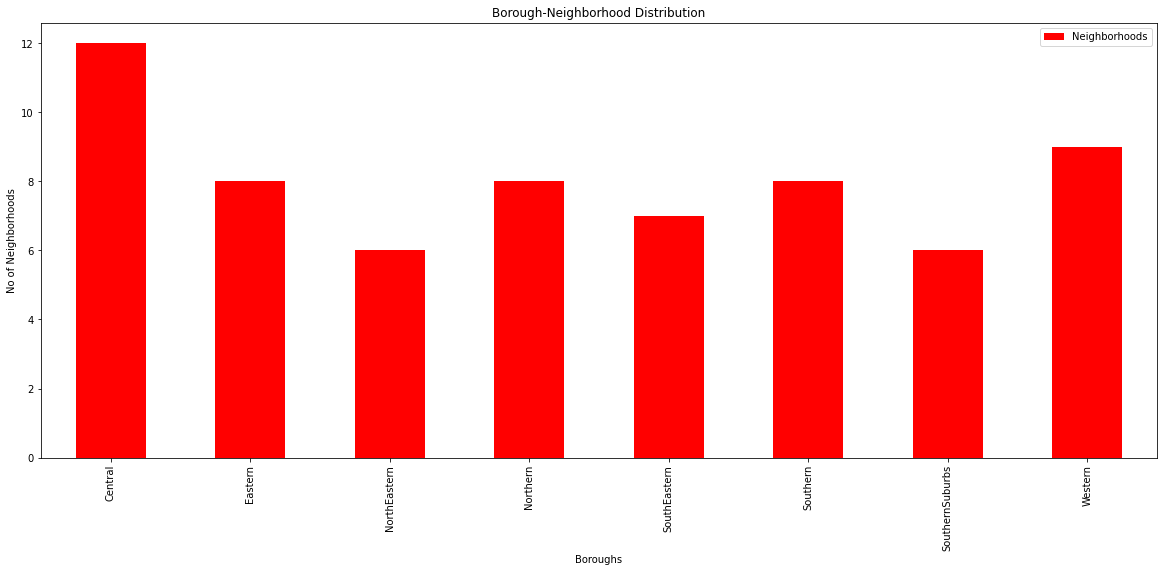

In [13]:
#plotting a graph
df_grp1.plot(kind = 'bar',figsize=(20, 8),color = 'red')
plt.ylabel('No of Neighborhoods')
plt.xlabel('Boroughs')
labels = df['Borough'].unique()
ticks = np.arange(0,8,1)
plt.xticks(ticks,labels)
plt.title('Borough-Neighborhood Distribution')
plt.show()

### Neighbohoods vs Population

In [14]:
df_2 = df[['Neighborhoods','Population']]
df_grp2 = df_2.groupby(['Neighborhoods'], as_index = False).max()
df_grp2.head()

,Neighborhoods,Population
0,Anjanapura,940039
1,Arekere,138760
2,BTM Layout,835743
3,Banashankari,810407
4,Banaswadi,632031


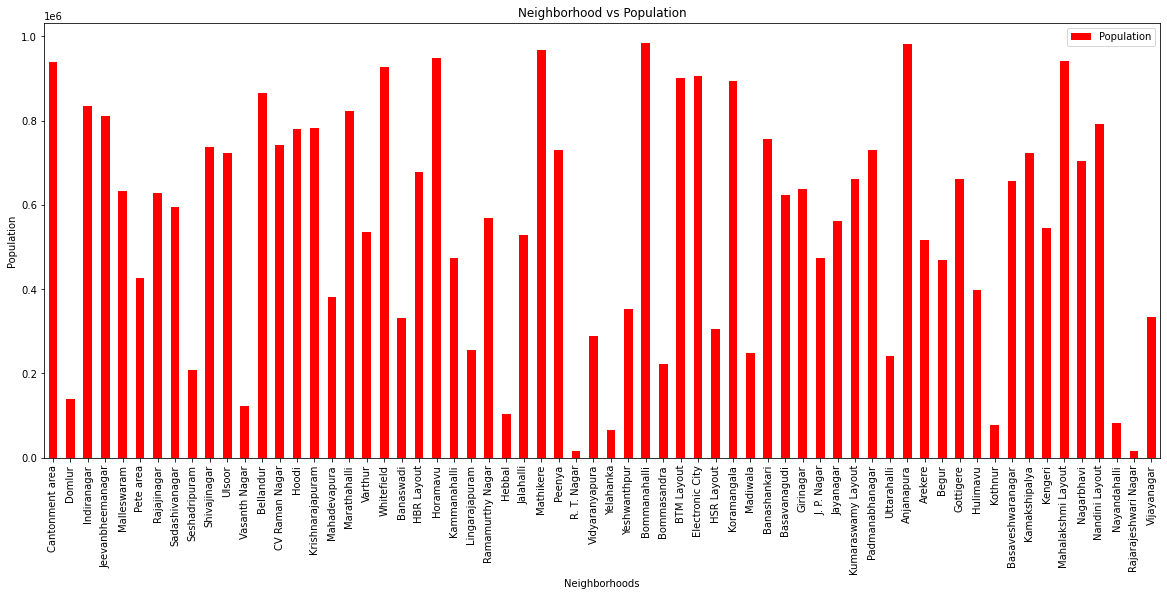

In [15]:
df_grp2.plot(kind = 'bar',stacked = False,color = 'red',figsize=(20, 8))
plt.ylabel('Population')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Population')
plt.show()

### Neighborhood vs Average Income

In [16]:
df_3 = df[['Neighborhoods','AverageIncome']]
df_grp3 = df_3.groupby(['Neighborhoods'], as_index = False).max()
df_grp3.head()

,Neighborhoods,AverageIncome
0,Anjanapura,44218.922553
1,Arekere,29378.716626
2,BTM Layout,49310.618884
3,Banashankari,57524.209528
4,Banaswadi,53349.701184


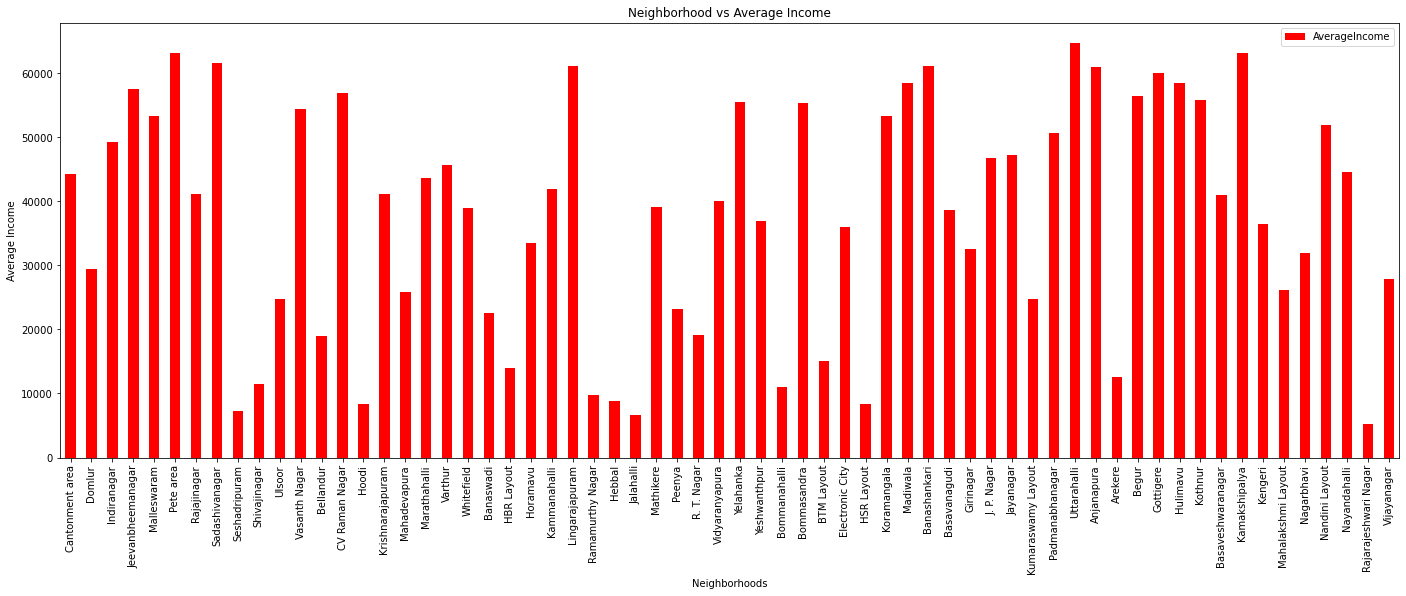

In [17]:
#color = ['red','orange','yellow','green','purple','blue','voilet','black','grey','brown']
df_grp3.plot(kind = 'bar',stacked = False,color = 'red' ,figsize=(24, 8))
plt.ylabel('Average Income')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Average Income')
plt.show()

### We see how different regions have different population,average income and their distribution different areas of Bangalore. This gives us the holistic idea of the dataset.

### Creating a Map of Bangalore

In [18]:
#getting the co-ordinates of Bangalore
geolocator = Nominatim(user_agent = "bangalore_explorer") 
location = geolocator.geocode("Bangalore")
print(location.address) 
print("The Geographical Coordinates of Bangalore are {}, {}".format(location.latitude, location.longitude))

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
The Geographical Coordinates of Bangalore are 12.9791198, 77.5912997


In [19]:
# create map of Bangalore using latitude and longitude values
latitude = location.latitude
longitude = location.longitude
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng]).add_to(map_bangalore)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

### Lets now explore each Neighborhood in detail using foursquare API

In [20]:
CLIENT_ID = '1DMW4ITPQHBV3UBZ2S2R4UBSVPL0LRFB0HQ2XGW0WCYXF214' # your Foursquare ID
CLIENT_SECRET = 'WKWTVF5N3I5XBVLFFEVI3KJ3HPORSJSEXYK50QCKX5GHCBBO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1DMW4ITPQHBV3UBZ2S2R4UBSVPL0LRFB0HQ2XGW0WCYXF214
CLIENT_SECRET:WKWTVF5N3I5XBVLFFEVI3KJ3HPORSJSEXYK50QCKX5GHCBBO


In [21]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,53270.063892


In [22]:
df.iloc[0,1]

'Cantonment area'

In [23]:
neighborhood_latitude = df.iloc[0, 2] # neighborhood latitude value
neighborhood_longitude = df.iloc[0, 3] # neighborhood longitude value

neighborhood_name = df.iloc[0, 1] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
print('Population - {} , Average Income - {} Rupees'.format(df.iloc[0,4],df.iloc[0,5]))

Latitude and longitude values of Cantonment area are 12.972442, 77.58064300000001.
Population - 866377 , Average Income - 18944.09979245654 Rupees


### Using Foursquare API, exploring area under 1000m radius of Cantonment area

In [24]:
LIMIT = 1000
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


url

'https://api.foursquare.com/v2/venues/explore?&client_id=1DMW4ITPQHBV3UBZ2S2R4UBSVPL0LRFB0HQ2XGW0WCYXF214&client_secret=WKWTVF5N3I5XBVLFFEVI3KJ3HPORSJSEXYK50QCKX5GHCBBO&v=20180605&ll=12.972442,77.58064300000001&radius=1000&limit=1000'

In [25]:
results = requests.get(url).json() #getting json file from the foursquare

### Creating a function which extracts the category of the venue

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Loading JSON data into Pandas Dataframe

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Hotel Fishland,Seafood Restaurant,12.975569,77.578592
1,Chikkana Tiffin Room,Indian Restaurant,12.968557,77.584282
2,Lakshmi Nataraj Refreshments,South Indian Restaurant,12.967476,77.579468
3,Udupi Sri Krishna Bhavan,Indian Restaurant,12.971563,77.574158
4,Vasudev Adigas,Indian Restaurant,12.973707,77.579257


In [29]:
#No of venues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

37 venues were returned by Foursquare.


### Let's create a function to repeat the same process for all the neighborhoods in Bangalore

In [30]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=1250):   #increasing radius to cover more areas
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        #print("Fetching venues for : ",name)            
        # create the API request URL
        LIMIT = 1000
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [31]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

In [32]:
print(bangalore_venues.shape)
bangalore_venues.head()

(2378, 8)


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Chikkana Tiffin Room,12.968557,77.584282,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Lakshmi Nataraj Refreshments,12.967476,77.579468,South Indian Restaurant
3,Cantonment area,Central,12.972442,77.580643,Udupi Sri Krishna Bhavan,12.971563,77.574158,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant


### This Data may contain duplicate venues as the radius of two or more neighborhoods may overlap.

In [33]:
bangalore_venues.drop_duplicates(subset = ['Venue Latitude', 'Venue Longitude'], inplace = True) 
bangalore_venues.shape

(2013, 8)

In [34]:
duplicate_rows = bangalore_venues[bangalore_venues.duplicated(['Venue', 'Venue Latitude', 'Venue Longitude'])] #Verify
duplicate_rows.shape

(0, 8)

In [35]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(25)

Venue Category
Indian Restaurant                352
Café                             142
Fast Food Restaurant              99
Coffee Shop                       67
Ice Cream Shop                    65
Pizza Place                       60
Chinese Restaurant                58
Department Store                  55
Bakery                            50
Hotel                             45
Restaurant                        31
Vegetarian / Vegan Restaurant     31
Italian Restaurant                30
Lounge                            28
Clothing Store                    27
Sandwich Place                    27
Snack Place                       26
Asian Restaurant                  24
Pub                               24
Bar                               24
South Indian Restaurant           24
Bus Station                       21
Breakfast Spot                    19
Gym                               19
Dessert Shop                      18
Name: Neighborhood, dtype: int64

In [36]:
print('There are {} uniques categories.'.format(bangalore_venues['Venue Category'].nunique()))

There are 204 uniques categories.


### Neighborhood vs Number of Venues¶

In [37]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Venue'].count().to_frame()
individual_bangalore_venue_count.head(15)

Venue
Borough Neighborhood            
Central Cantonment area       50
        Domlur               100
        Indiranagar           54
        Jeevanbheemanagar     40
        Malleswaram           42
        Pete area             15
        Rajajinagar           32
        Sadashivanagar        36
        Seshadripuram         80
        Shivajinagar         100
        Ulsoor                31
        Vasanth Nagar         44
Eastern Bellandur             63
        CV Raman Nagar        37
        Hoodi                 13

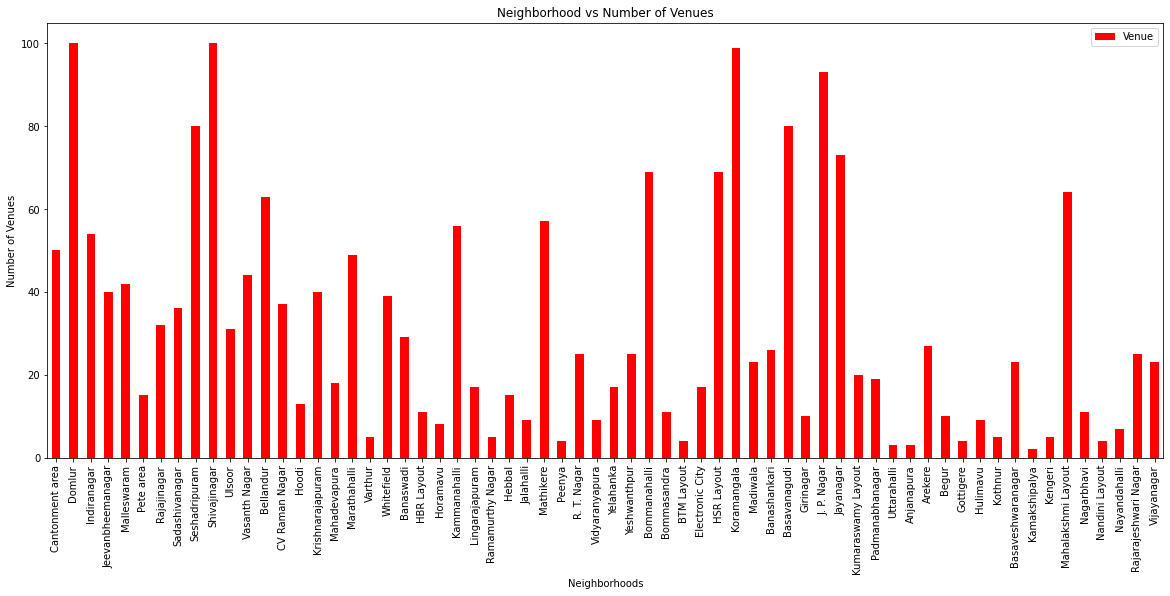

In [38]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)

individual_bangalore_venue_count.plot(kind = 'bar',stacked = False,color = 'red',figsize=(20, 8))
plt.ylabel('Number of Venues')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Number of Venues')
plt.show()

### Bus Stations in Bangalore

In [51]:
bangalore_bus = bangalore_venues[bangalore_venues['Venue Category'].str.contains('Bus Station')]
bangalore_bus.head(10)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
42,Cantonment area,Central,12.972442,77.580643,Majestic / Kempegowda Bus Stand,12.977502,77.572274,Bus Station
448,Sadashivanagar,Central,13.006800,77.581300,Gayathri Vihar Bus Stop,13.013464,77.584205,Bus Station
977,Mahadevapura,Eastern,12.991300,77.687400,Mahadevpura,12.991452,77.687106,Bus Station
989,Mahadevapura,Eastern,12.991300,77.687400,B Narayanapura Bus Stop,12.996381,77.683466,Bus Station
1039,Marathahalli,Eastern,12.959200,77.697400,Karthik Nagar Bus Stop,12.968236,77.701496,Bus Station
1050,Varthur,Eastern,12.938900,77.741200,Ramagondanahalli Bus Stop,12.947888,77.742059,Bus Station
1116,Banaswadi,NorthEastern,13.012000,77.647100,Banaswadi Ring Road Bus Stop,13.019483,77.654530,Bus Station
1244,Lingarajapuram,NorthEastern,13.008400,77.630600,ITC Bus Stop,12.998523,77.625955,Bus Station
1262,Hebbal,Northern,13.035800,77.597000,Hebbal Bus Terminus,13.040231,77.589654,Bus Station
1263,Hebbal,Northern,13.035800,77.597000,Kempapura Bus Stop,13.043666,77.600717,Bus Station


### Bus Stations in Neighborhoods

In [52]:
df_bus = bangalore_bus[['Neighborhood','Venue']]
df_grp_bus = df_bus.groupby(['Neighborhood'], as_index = False).count() #arranging no of neighborhoods and boroughs
df_grp_bus.rename(columns={"Venue": "Number of Bus Stations"},inplace = True)
df_grp_bus.head(10)

,Neighborhood,Number of Bus Stations
0,Banaswadi,1
1,Basaveshwaranagar,1
2,Cantonment area,1
3,Electronic City,1
4,Hebbal,2
5,J. P. Nagar,1
6,Kamakshipalya,1
7,Kengeri,1
8,Lingarajapuram,1
9,Madiwala,1


### Let's plot the bus stations on a map

In [54]:
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, neighborhood in zip(bangalore_bus['Venue Latitude'], bangalore_bus['Venue Longitude'], bangalore_bus['Venue'], bangalore_bus['Neighborhood']):
    label = '{}, {}'.format(venue,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng]).add_to(map_bangalore)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

## Clustering

### Creating a dataframe for clustering.

In [55]:
df_grp_bus.head()

,Neighborhood,Number of Bus Stations
0,Banaswadi,1
1,Basaveshwaranagar,1
2,Cantonment area,1
3,Electronic City,1
4,Hebbal,2


In [56]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,53270.063892


### Putting Neighborhood, Number of Gyms, Population and Average Income together in one Dataframe.

In [57]:
column = ['Neighborhoods','Number of Bus Stations','Population','AverageIncome']
cluster_df = pd.DataFrame(columns=column)
cluster_df['Neighborhoods'] = df['Neighborhoods']
cluster_df['Population'] = df['Population']
cluster_df['AverageIncome'] = df['AverageIncome']
cluster_df.head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome
0,Cantonment area,NaN,866377,18944.099792
1,Domlur,NaN,743186,56837.022198
2,Indiranagar,NaN,474289,41991.817435
3,Jeevanbheemanagar,NaN,527874,6667.447632
4,Malleswaram,NaN,893629,53270.063892


In [58]:
for i,row in cluster_df.iterrows() :
    cluster_df.loc[i,'Number of Bus Stations'] = 0
            
for idx, row in cluster_df.iterrows() :
    for idx1,row1 in df_grp_bus.iterrows() :
        if cluster_df.loc[idx,'Neighborhoods'] == df_grp_bus.loc[idx1,'Neighborhood'] :
            cluster_df.loc[idx,'Number of Bus Stations'] = df_grp_bus.loc[idx1,'Number of Bus Stations']

cluster_df.head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome
0,Cantonment area,1,866377,18944.099792
1,Domlur,0,743186,56837.022198
2,Indiranagar,0,474289,41991.817435
3,Jeevanbheemanagar,0,527874,6667.447632
4,Malleswaram,0,893629,53270.063892


### Let's find the number of clusters required using the elbow method.

In [59]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(cluster_df.drop(columns = ['Neighborhoods','Population','AverageIncome'],axis=1))
    cluster_df['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/e

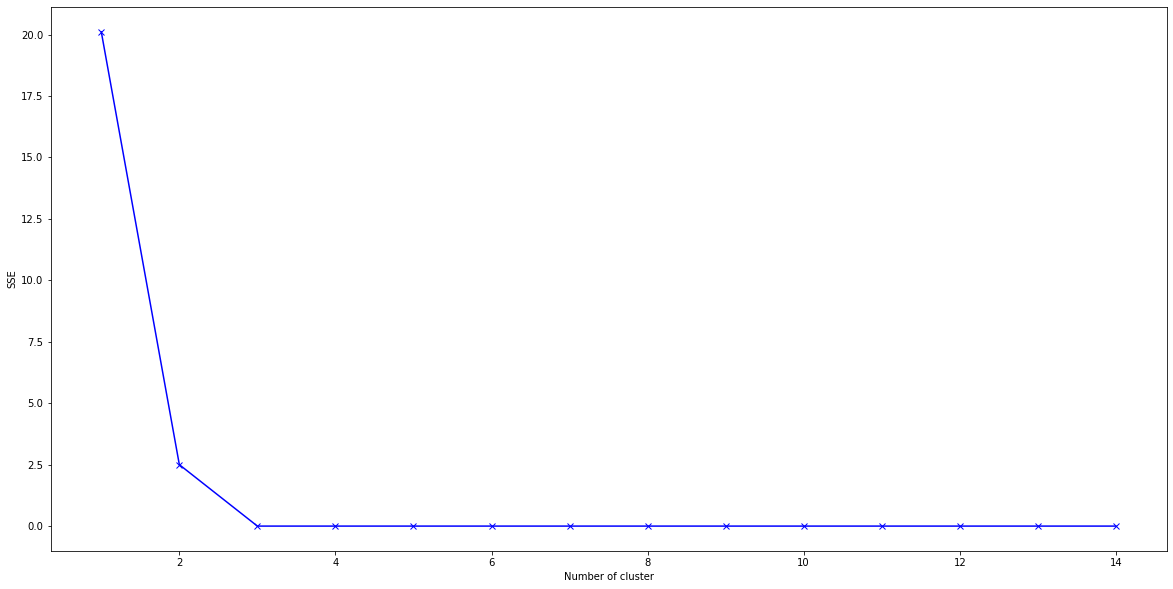

In [60]:
plt.figure(figsize=(20,10))
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for k is 3.

In [61]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(cluster_df.drop(['Neighborhoods','Population','AverageIncome'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [62]:
cluster_df['Cluster'] = kmeans.labels_
cluster_df.groupby('Cluster')['Neighborhoods'].count()

Cluster
0    15
1    46
2     3
Name: Neighborhoods, dtype: int64

In [63]:
cluster_df_sorted = df[['Neighborhoods','Latitude','Longitude']]
cluster_df_sorted = cluster_df_sorted.merge(cluster_df,on = 'Neighborhoods')
cluster_df_sorted.head()

,Neighborhoods,Latitude,Longitude,Number of Bus Stations,Population,AverageIncome,Cluster
0,Cantonment area,12.972442,77.580643,1,866377,18944.099792,0
1,Domlur,12.960992,77.638726,0,743186,56837.022198,1
2,Indiranagar,12.971891,77.641151,0,474289,41991.817435,1
3,Jeevanbheemanagar,12.962900,77.659500,0,527874,6667.447632,1
4,Malleswaram,13.003100,77.564300,0,893629,53270.063892,1


### Creating a Folium map to show different clusters

In [64]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#color scheme
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_df_sorted['Latitude'], cluster_df_sorted['Longitude'], cluster_df_sorted['Neighborhoods'], cluster_df_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

### Now let's examine each cluster

In [65]:
cluster_df.loc[cluster_df['Cluster'] == 0].head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome,Cluster
0,Cantonment area,1,866377,18944.099792,0
7,Sadashivanagar,1,662625,59943.541564,0
17,Marathahalli,1,249182,58448.658524,0
18,Varthur,1,546186,36433.267304,0
20,Banaswadi,1,632031,53349.701184,0


In [66]:
cluster1 = cluster_df.loc[cluster_df['Cluster'] == 1]
cluster1.head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome,Cluster
1,Domlur,0,743186,56837.022198,1
2,Indiranagar,0,474289,41991.817435,1
3,Jeevanbheemanagar,0,527874,6667.447632,1
4,Malleswaram,0,893629,53270.063892,1
5,Pete area,0,730999,50712.430215,1


In [67]:
cluster2 = cluster_df.loc[cluster_df['Cluster'] == 2]
cluster2.head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome,Cluster
16,Mahadevapura,2,905568,35915.973333,2
26,Hebbal,2,926976,39022.694137,2
58,Mahalakshmi Layout,2,306403,8416.293069,2


#### We see that in Cluster 0 & 2, there are bus stations available. But in Cluster 1, there is no bus station at all. So we will look into Cluster 1 for the ideal location for a new bus station.

### Neighborhood vs Population vs Average Income

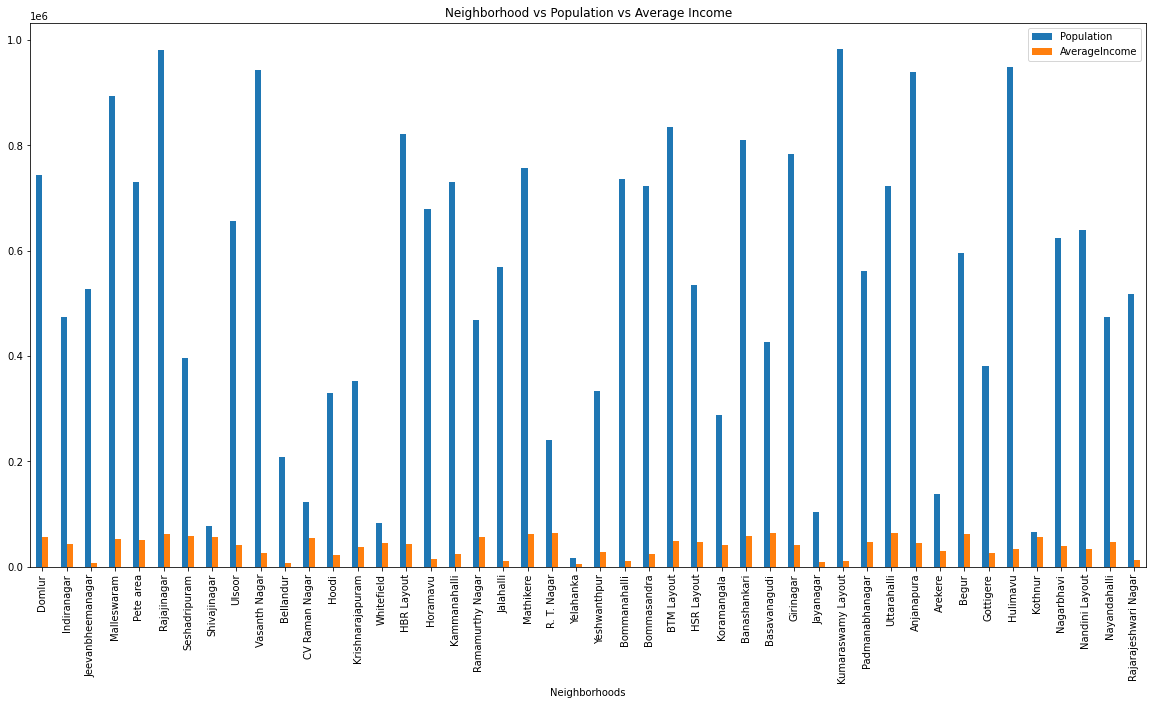

In [69]:
cluster1.drop(['Number of Bus Stations','Cluster'],axis = 1).plot(kind = 'bar',figsize=(20,10))
labels = cluster1['Neighborhoods'].unique()
ticks = np.arange(0,46,1)
plt.xticks(ticks,labels)
plt.xlabel("Neighborhoods")
plt.title("Neighborhood vs Population vs Average Income")
plt.show()


### The ideal location for a new bus station would be a place where the population is high. 
### Displaying top 10 areas with relatively high population.

In [70]:
final = cluster1.sort_values('Population', ascending=False)
final.head(10)

,Neighborhoods,Number of Bus Stations,Population,AverageIncome,Cluster
46,Kumaraswamy Layout,0,983614,10941.420381,1
6,Rajajinagar,0,981362,60967.535874,1
53,Hulimavu,0,949207,33486.513518,1
11,Vasanth Nagar,0,942711,26168.448092,1
49,Anjanapura,0,940039,44218.922553,1
4,Malleswaram,0,893629,53270.063892,1
36,BTM Layout,0,835743,49310.618884,1
21,HBR Layout,0,822101,43625.383678,1
41,Banashankari,0,810407,57524.209528,1
43,Girinagar,0,783535,41146.060246,1


#### Now we foucs on areas with low average income among these neigborhoods with high population, since the people with relatively low income would prefer saving money that they would have to spend on other expensive modes of transport (eg: Cabs or even buying a car for themselves)

In [71]:
final = final.head(10)
final = final.sort_values('AverageIncome', ascending = True)
final.head()

,Neighborhoods,Number of Bus Stations,Population,AverageIncome,Cluster
46,Kumaraswamy Layout,0,983614,10941.420381,1
11,Vasanth Nagar,0,942711,26168.448092,1
53,Hulimavu,0,949207,33486.513518,1
43,Girinagar,0,783535,41146.060246,1
21,HBR Layout,0,822101,43625.383678,1


### So these are the top 5 neighborhoods which are ideal locations for the construction of new bus stations.

In [72]:
final_loc = final.merge(df, on = 'Neighborhoods')
final_loc[['Borough','Neighborhoods','Population_x','AverageIncome_x']].head()

,Borough,Neighborhoods,Population_x,AverageIncome_x
0,Southern,Kumaraswamy Layout,983614,10941.420381
1,Central,Vasanth Nagar,942711,26168.448092
2,SouthernSuburbs,Hulimavu,949207,33486.513518
3,Southern,Girinagar,783535,41146.060246
4,NorthEastern,HBR Layout,822101,43625.383678


#### The top 5 neighborhoods that need new bus stations are 
#### 1. Kumaraswamy Layout 
#### 2. Vasanth Nagar 
#### 3. Hulimavu 
#### 4. Girinagar 
#### 5. HBR Layout

# Thank you!